### SAMRIDHI SEHGAL
# TASK-2
## Supervised Machine Learning
### regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


What will be predicted score if a student study for 9.25 hrs in a
day?


**LET US IMPORT THE REQUIRED LIBRARIES**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**USING THE GIVEN DATA**

In [3]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Number of rows and columns in the dataset?

In [4]:
# shape of data set (No. of rows, No. of column)
df.shape

(25, 2)

Let us have a Statistical look at the data!

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the type of relation between score and hours

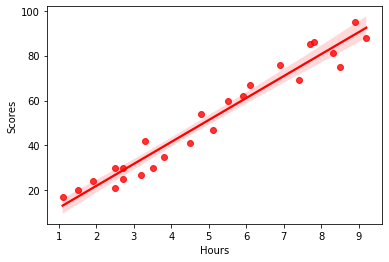

In [10]:
sns.regplot(x= 'Hours', y = 'Scores', data = df, color='r')

### Distribution of scores wrt. number of hours studied

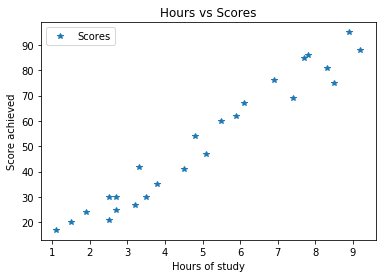

In [11]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours of study')  
plt.ylabel('Score achieved')  
plt.show()

Since we donot have much data, we will have to check if the amount of data affects the results. So, we will have to tell whether the distribition is Gaussian or not!

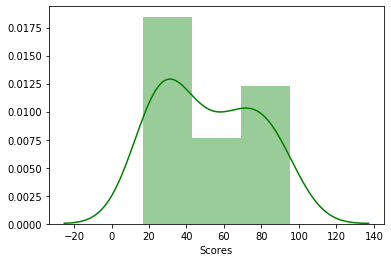

In [16]:
sns.distplot(df['Scores'], color="green")

### Now let us dive in to the main task. First of all, we will properly prepare and split the data to work upon it.

Let us assign proper designation to the data variables.


In [19]:
X = df.iloc[:,:-1].values ##all the rows of all columns except the last column as that is our label
Y = df.iloc[:,1].values   ##the label column with all of its rows

Test and train data using Scikit learn

In [20]:
from sklearn.model_selection import train_test_split  
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

## Train and test the model

In [23]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train,y_train)
print('Successfully trained the model')

Successfully trained the model


Let us check by plotting the regression line for the given data


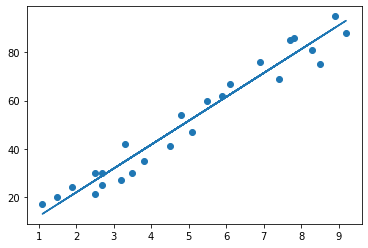

In [24]:
line = lnr.coef_*X+lnr.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Evalution of the Model performance!


In [25]:
# sample prediction using the model!
pred_y = lgr.predict(x_valid)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score = r2_score(pred_y,y_valid)
sq = mean_squared_error(pred_y,y_valid)
ab = mean_absolute_error(pred_y,y_valid)

print('r2_score: {}'.format(score))
print('mean squared error: {}'.format(sq))
print('Mean Absolute Error ',ab)

r2_score: 0.9546785947197246
mean squared error: 21.5987693072174
Mean Absolute Error  4.183859899002975


In [33]:
# Comparing Actual vs Predicted after combining them into a dataframe
df_label = pd.DataFrame({'Actual': y_valid, 'Predicted': pred_y})  
df_label

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Comparing the actual and predicted values by the model using a line chart

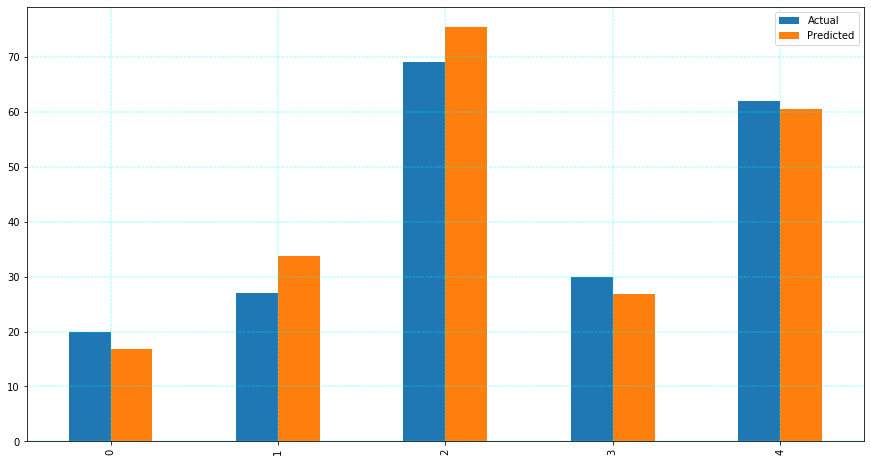

In [51]:
df1 = df_label.head()
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-.', linewidth='0.4', color='aqua')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgreen')
plt.show()


## Now predicting the Score for 9.25 hours as asked in the problem statement

In [53]:
hour = [[9.25]]
score_pred= lnr.predict(hour)
print('Number of hours studied: {}'.format(hour))
print('Score predicted by model: {}'.format(score_pred))

Number of hours studied: [[9.25]]
Score predicted by model: [93.69173249]


## So, we will score a percentage score of 93.69%(rounded) after studying for 9.25 hours!!